In [31]:
#!pip install mysql-connector-python

import mysql.connector as sql
import pandas as pd

In [32]:
mydb = sql.connect(
    host = "localhost",
    user = "root",
    passwd = "Saurabh@123",
    database = 'insurance',
    use_pure = True
)



In [33]:
mydb

In [34]:
import pandas as pd

# Assuming mydb is your database connection object

# Read from the 'accident' table
accident = pd.read_sql('SELECT * FROM accident', mydb)

# Read from the 'bike' table
bike = pd.read_sql('SELECT * FROM bike', mydb)

# Read from the 'car' table
car = pd.read_sql('SELECT * FROM car', mydb)

# Read from the 'claim' table
claim = pd.read_sql('SELECT * FROM claim', mydb)

# Read from the 'claim_inspector' table
claim_inspector = pd.read_sql('SELECT * FROM claim_inspector', mydb)

# Read from the 'customer' table
customer = pd.read_sql('SELECT * FROM customer', mydb)

# Read from the 'customer_phone' table
customer_phone = pd.read_sql('SELECT * FROM customer_phone', mydb)

# Read from the 'finance_dept' table
finance_dept = pd.read_sql('SELECT * FROM finance_dept', mydb)

# Read from the 'garage_partner' table
garage_partner = pd.read_sql('SELECT * FROM garage_partner', mydb)

# Read from the 'policy' table
policy = pd.read_sql('SELECT * FROM policy', mydb)

# Read from the 'policyclaims' table
policyclaims = pd.read_sql('SELECT * FROM policyclaims', mydb)

# Read from the 'policytransactions' table
policytransactions = pd.read_sql('SELECT * FROM policytransactions', mydb)

# Read from the 'report' table
report = pd.read_sql('SELECT * FROM report', mydb)


C:\Users\saurabh.LAPTOP-2HELHMCR\AppData\Local\Temp\ipykernel_10380\1059252424.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\saurabh.LAPTOP-2HELHMCR\AppData\Local\Temp\ipykernel_10380\1059252424.py:9: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\saurabh.LAPTOP-2HELHMCR\AppData\Local\Temp\ipykernel_10380\1059252424.py:12: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\saurabh.LAPTOP-2HELHMCR\AppData\Local\Temp\ipykernel_10380\1059252424.py:15: UserWarning:

pandas only supports SQLAlchemy con

In [35]:
customer

,customer_id,first_name,last_name,birth_date
0,100,Fahey,Bobby,1972-11-20
1,101,Dare,Ryann,1988-02-03
2,103,Hauck,Patience,2007-05-08
3,104,Raynor,Hailey,2022-08-31
4,105,Leannon,Clara,2010-01-31
...,...,...,...,...
95,242,Marquardt,Neoma,2003-02-12
96,244,O'Keefe,Ila,2002-06-12
97,248,Metz,Alysha,1996-09-28
98,249,Boyle,Albert,2002-05-27


In [36]:
import pandas as pd
import matplotlib as plt
import plotly.express as px
import matplotlib.pyplot as plt


## 1.How does the distribution of claim amounts vary?

In [37]:
# Creating an interactive histogram
fig = px.histogram(claim, x='issued_amount', nbins=20, title='Distribution of Claim Amounts')

# Customizing layout
fig.update_layout(
    xaxis_title='Claim Amount',
    yaxis_title='Frequency',
    bargap=0.1,
    plot_bgcolor='rgba(0,0,0,0)'
)

# Showing the plot
fig.show()


## 2.Are there any trends in claim issuance over time?

In [38]:
# Creating an interactive scatter plot
fig = px.scatter(claim, x='issued_date', y='issued_amount', title='Claim Issuance Over Time')

# Customizing layout
fig.update_layout(
    xaxis_title='Date of Issuance',
    yaxis_title='Claim Amount',
    plot_bgcolor='rgba(0,0,0,0)'
)

# Show the plot
fig.show()


## 3.What is the distribution of policy types?

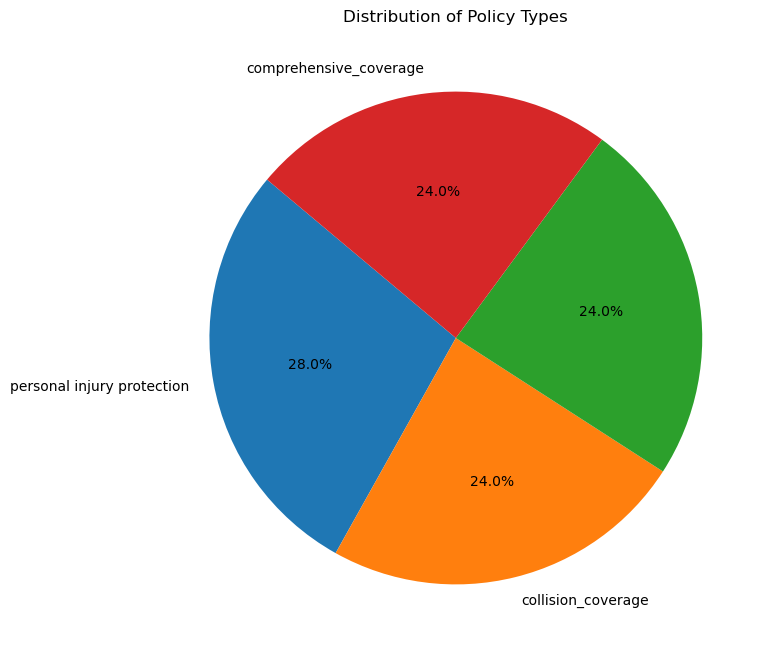

In [39]:
policy_distribution = policy['policy_type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(policy_distribution, labels=policy_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Policy Types')
plt.show()


## 4.What is the distribution of disbursement statuses?


In [40]:
# Plotting histogram using Plotly Express
fig = px.histogram(finance_dept, x='disbursement_status', title='Distribution of Disbursement Statuses',
                   labels={'Disbursement_status': 'Disbursement Status', 'count': 'Frequency'},
                   color_discrete_sequence=['#1f77b4'])  # Setting color

# Customizing layout
fig.update_layout(xaxis={'categoryorder':'total descending'},  # Order bars by frequency
                  yaxis_title='Frequency',
                  xaxis_title='Disbursement Status',
                  plot_bgcolor='rgba(0,0,0,0)',
                  bargap=0.1)

# Showing the plot
fig.show()


## 5.What is the distribution of fraud detection results?

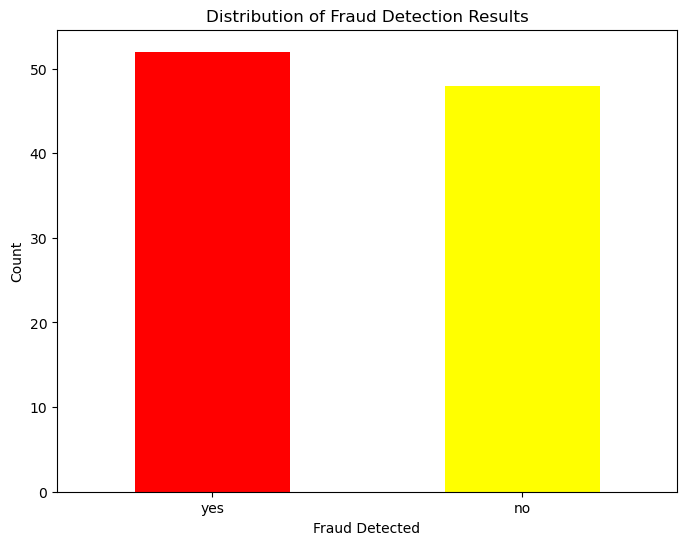

In [41]:
fraud_distribution = report['fraud_detected'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
fraud_distribution.plot(kind='bar', color=['red', 'yellow'])
plt.title('Distribution of Fraud Detection Results')
plt.xlabel('Fraud Detected')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


## 6.What is the distribution of customer ages?



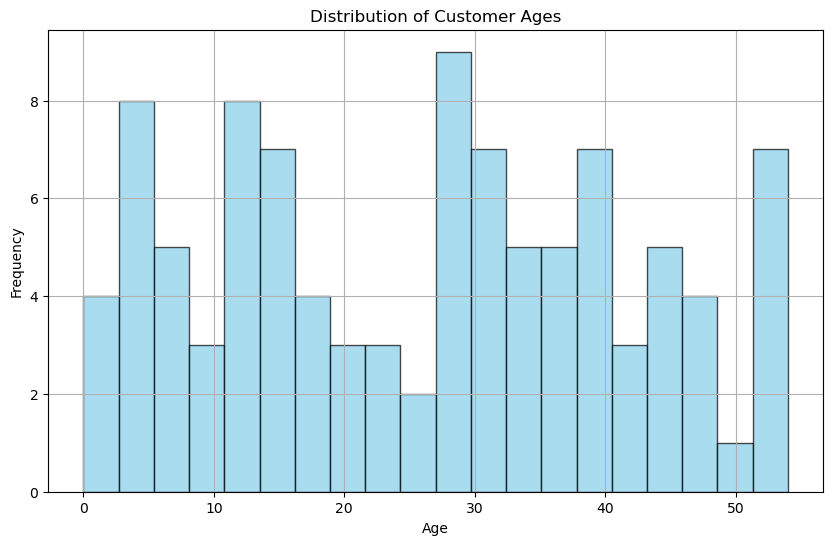

In [42]:
# Convert 'birth_date' column to age
customer['age'] = pd.Timestamp.now().year - pd.to_datetime(customer['birth_date']).dt.year

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(customer['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# 7. Line chart to visualize the trend of sum insured over time:

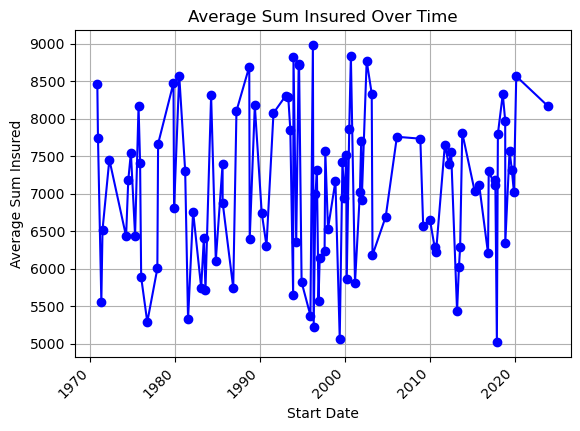

In [43]:
policy['start_date'] = pd.to_datetime(policy['start_date'])

# Grouping by 'start_date' and calculating the average sum insured for each date
sum_insured_trend = policy.groupby('start_date')['sum_insured'].mean()

# Plotting the trend of sum insured over time as a line chart
sum_insured_trend.plot(kind='line', marker='o', color='blue')
plt.title('Average Sum Insured Over Time')
plt.xlabel('Start Date')
plt.ylabel('Average Sum Insured')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
